# EXPLORATORY DATA ANALYSIS
## ANALYSE UNIVARIEE

In [1]:
import sys
import os
sys.path.append(os.path.abspath("../src"))

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from data.processing import *

In [3]:
df_train = pd.read_csv('../data/processed/df_client_train_final.csv')

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131248 entries, 0 to 131247
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   client_id                131248 non-null  object 
 1   district                 131248 non-null  int64  
 2   client_catg              131248 non-null  int64  
 3   region                   131248 non-null  int64  
 4   creation_date            131248 non-null  object 
 5   target                   131248 non-null  float64
 6   counter_number           131248 non-null  int64  
 7   counter_code             131248 non-null  int64  
 8   reading_remarque_min     131248 non-null  int64  
 9   reading_remarque_max     131248 non-null  int64  
 10  reading_remarque_std     125604 non-null  float64
 11  reading_remarque_mean    131248 non-null  float64
 12  reading_remarque_median  131248 non-null  float64
 13  conso_level1_sum         131248 non-null  int64  
 14  cons

In [5]:
df_train.columns

Index(['client_id', 'district', 'client_catg', 'region', 'creation_date',
       'target', 'counter_number', 'counter_code', 'reading_remarque_min',
       'reading_remarque_max', 'reading_remarque_std', 'reading_remarque_mean',
       'reading_remarque_median', 'conso_level1_sum', 'conso_level2_sum',
       'conso_level3_sum', 'conso_level4_sum', 'conso_min', 'conso_max',
       'conso_std', 'conso_mean', 'conso_median', 'tarif_type',
       'counter_statue', 'counter_coefficient', 'palier_max',
       'nb_max_franchi'],
      dtype='object')

In [6]:
df_train = convert_to_category(df_train, ['district','client_catg','region', 'target','tarif_type','counter_statue', 'counter_coefficient', 'palier_max'])

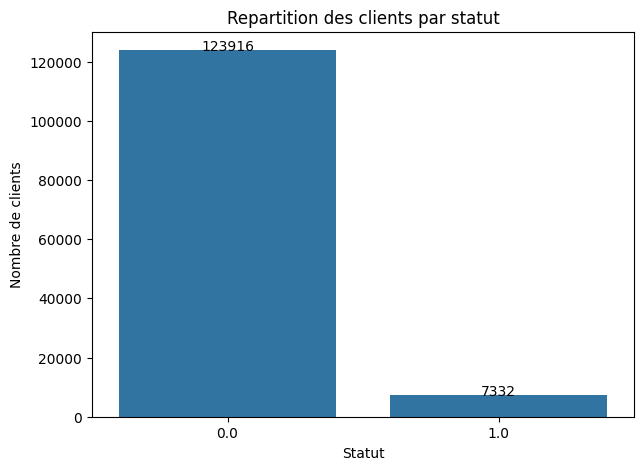

In [16]:
plt.figure(figsize=(7,5))
ax = sns.countplot(x='target', data=df_train)
plt.title('Repartition des clients par statut')
plt.xlabel('Statut')
plt.ylabel('Nombre de clients')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3, '{:1.0f}'.format(height), ha="center")
plt.show()

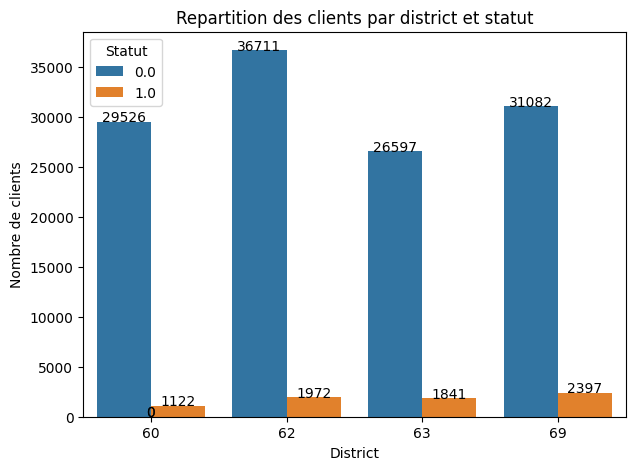

In [18]:
plt.figure(figsize=(7,5))
ax = sns.countplot(x='district', hue='target', data=df_train)
plt.title('Repartition des clients par district et statut')
plt.xlabel('District')
plt.ylabel('Nombre de clients')
plt.legend(title = 'Statut')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3, '{:1.0f}'.format(height), ha="center")
plt.show()

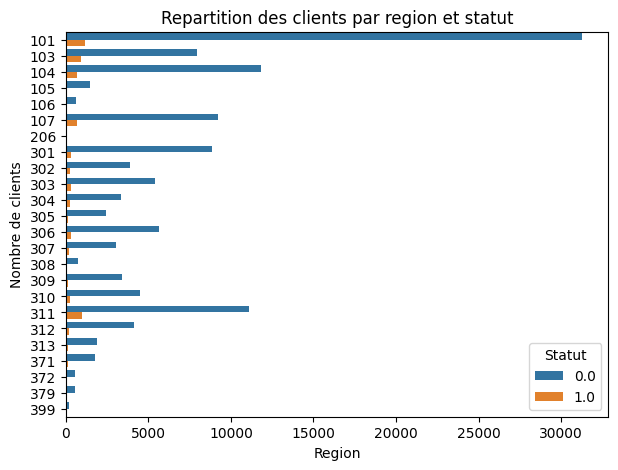

In [ ]:
plt.figure(figsize=(7,5))
ax = sns.countplot(y='region', hue='target', data=df_train)
plt.title('Repartition des clients par region et statut')
plt.xlabel('Region')
plt.ylabel('Nombre de clients')
plt.legend(title = 'Statut')
plt.show()

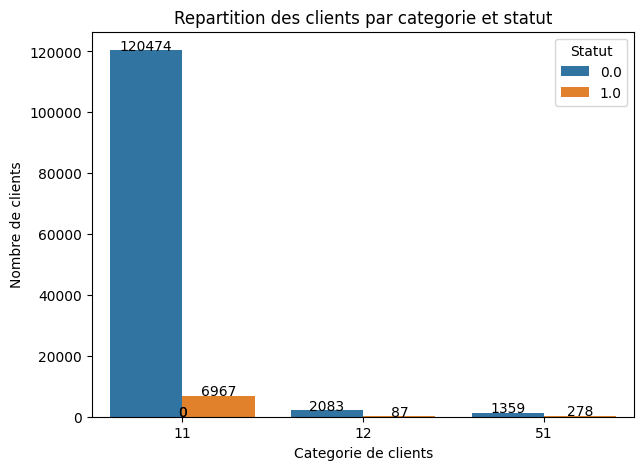

In [ ]:
plt.figure(figsize=(7,5))
ax = sns.countplot(x='client_catg', hue='target', data=df_train)
plt.title('Repartition des clients par categorie et statut')
plt.xlabel('Categorie de clients')
plt.ylabel('Nombre de clients')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3, '{:1.0f}'.format(height), ha="center")
plt.legend(title = 'Statut')
plt.show()

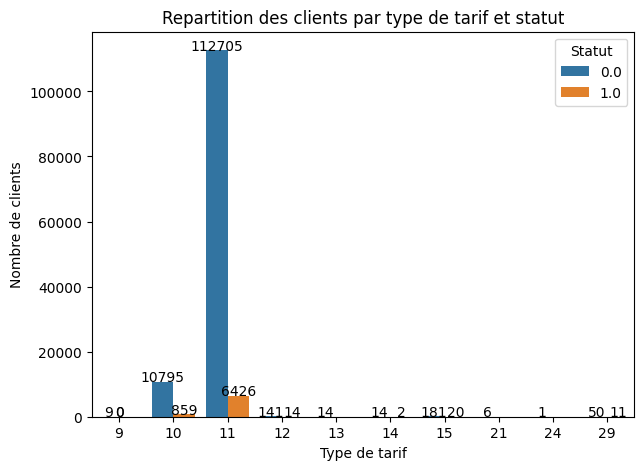

In [31]:
plt.figure(figsize=(7,5))
ax = sns.countplot(x='tarif_type', hue='target', data=df_train)
plt.title('Repartition des clients par type de tarif et statut')
plt.xlabel('Type de tarif')
plt.ylabel('Nombre de clients')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3, '{:1.0f}'.format(height), ha="center")
plt.legend(title = 'Statut')
plt.show()

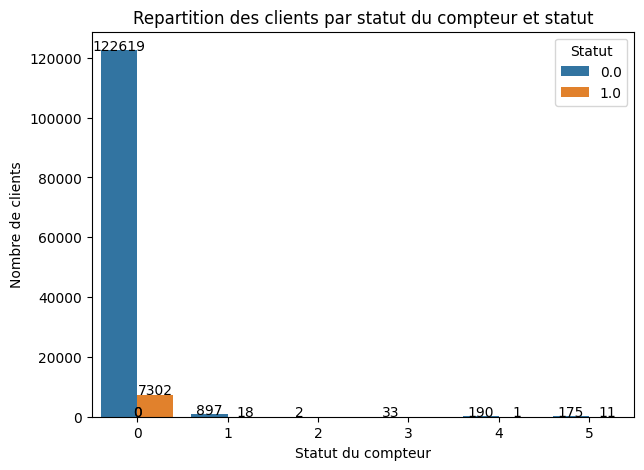

In [32]:
plt.figure(figsize=(7,5))
ax = sns.countplot(x='counter_statue', hue='target', data=df_train)
plt.title('Repartition des clients par statut du compteur et statut')
plt.xlabel('Statut du compteur')
plt.ylabel('Nombre de clients')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3, '{:1.0f}'.format(height), ha="center")
plt.legend(title = 'Statut')
plt.show()

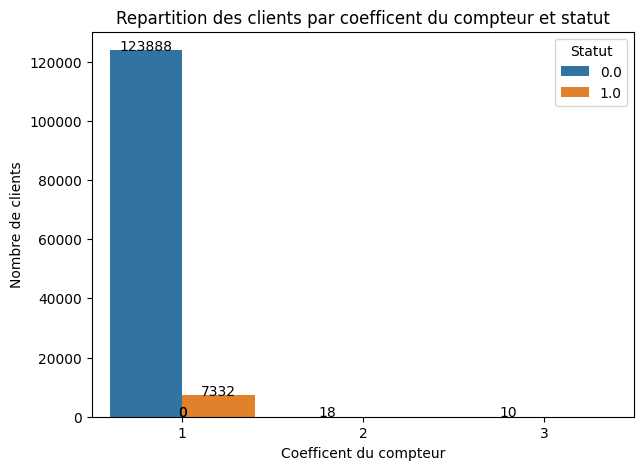

In [33]:
plt.figure(figsize=(7,5))
ax = sns.countplot(x='counter_coefficient', hue='target', data=df_train)
plt.title('Repartition des clients par coefficent du compteur et statut')
plt.xlabel('Coefficent du compteur')
plt.ylabel('Nombre de clients')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3, '{:1.0f}'.format(height), ha="center")
plt.legend(title = 'Statut')
plt.show()

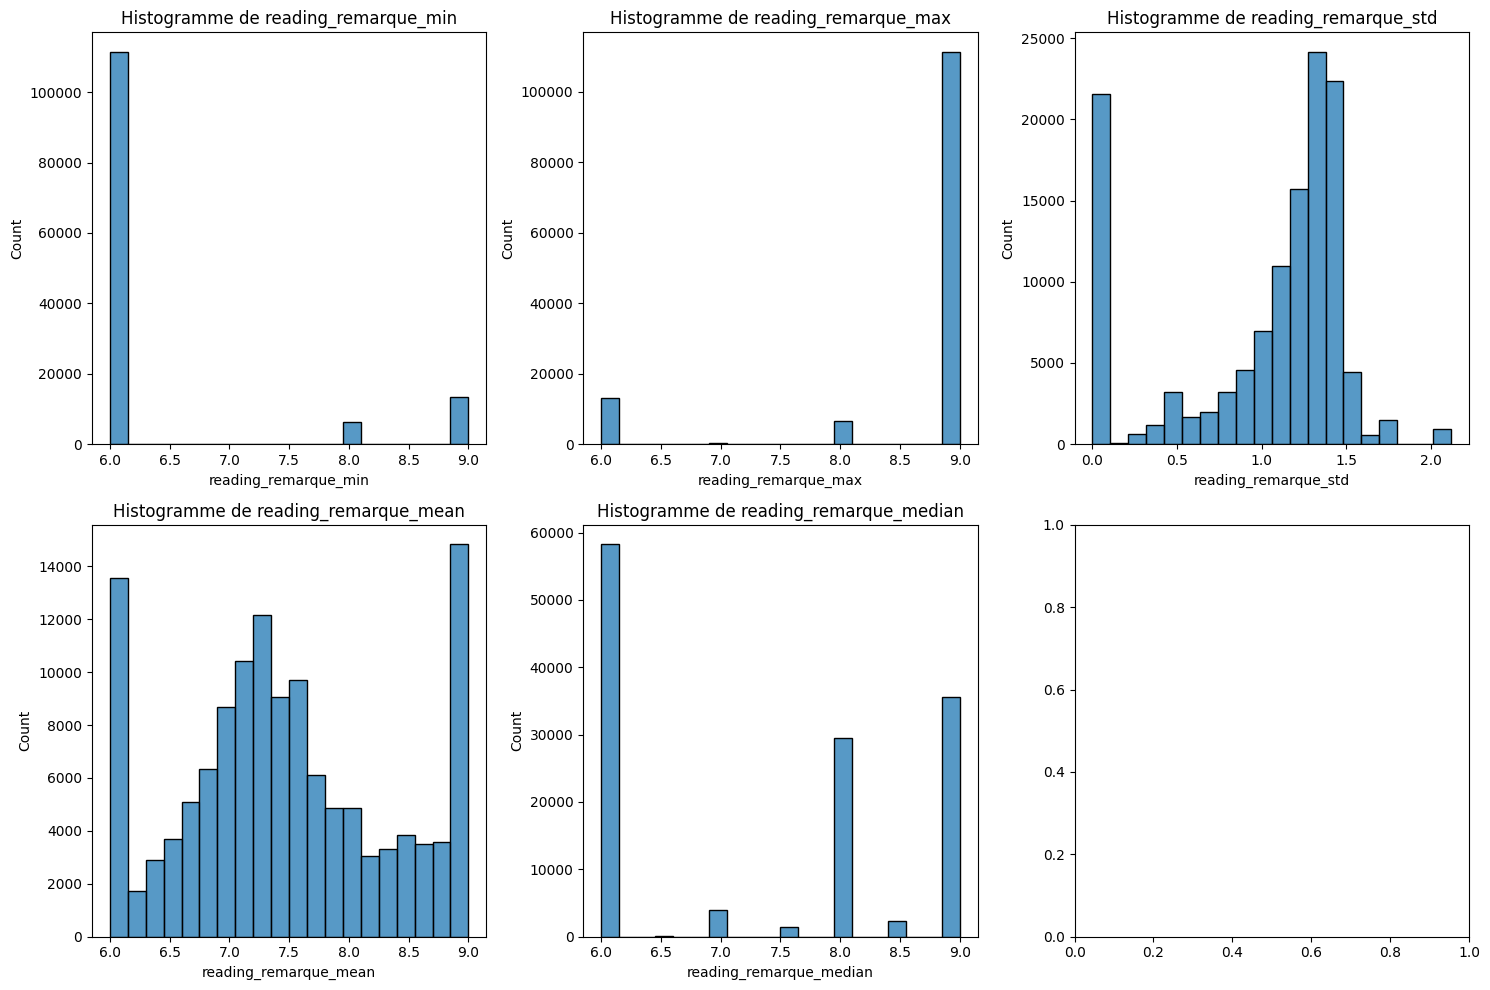

In [34]:
colonnes_reading = ['reading_remarque_min', 'reading_remarque_max', 'reading_remarque_std', 'reading_remarque_mean', 'reading_remarque_median']
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, col in enumerate(colonnes_reading):
    sns.histplot(x=col, data=df_train, bins=20, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Histogramme de {col}')
    
plt.tight_layout()
plt.show()

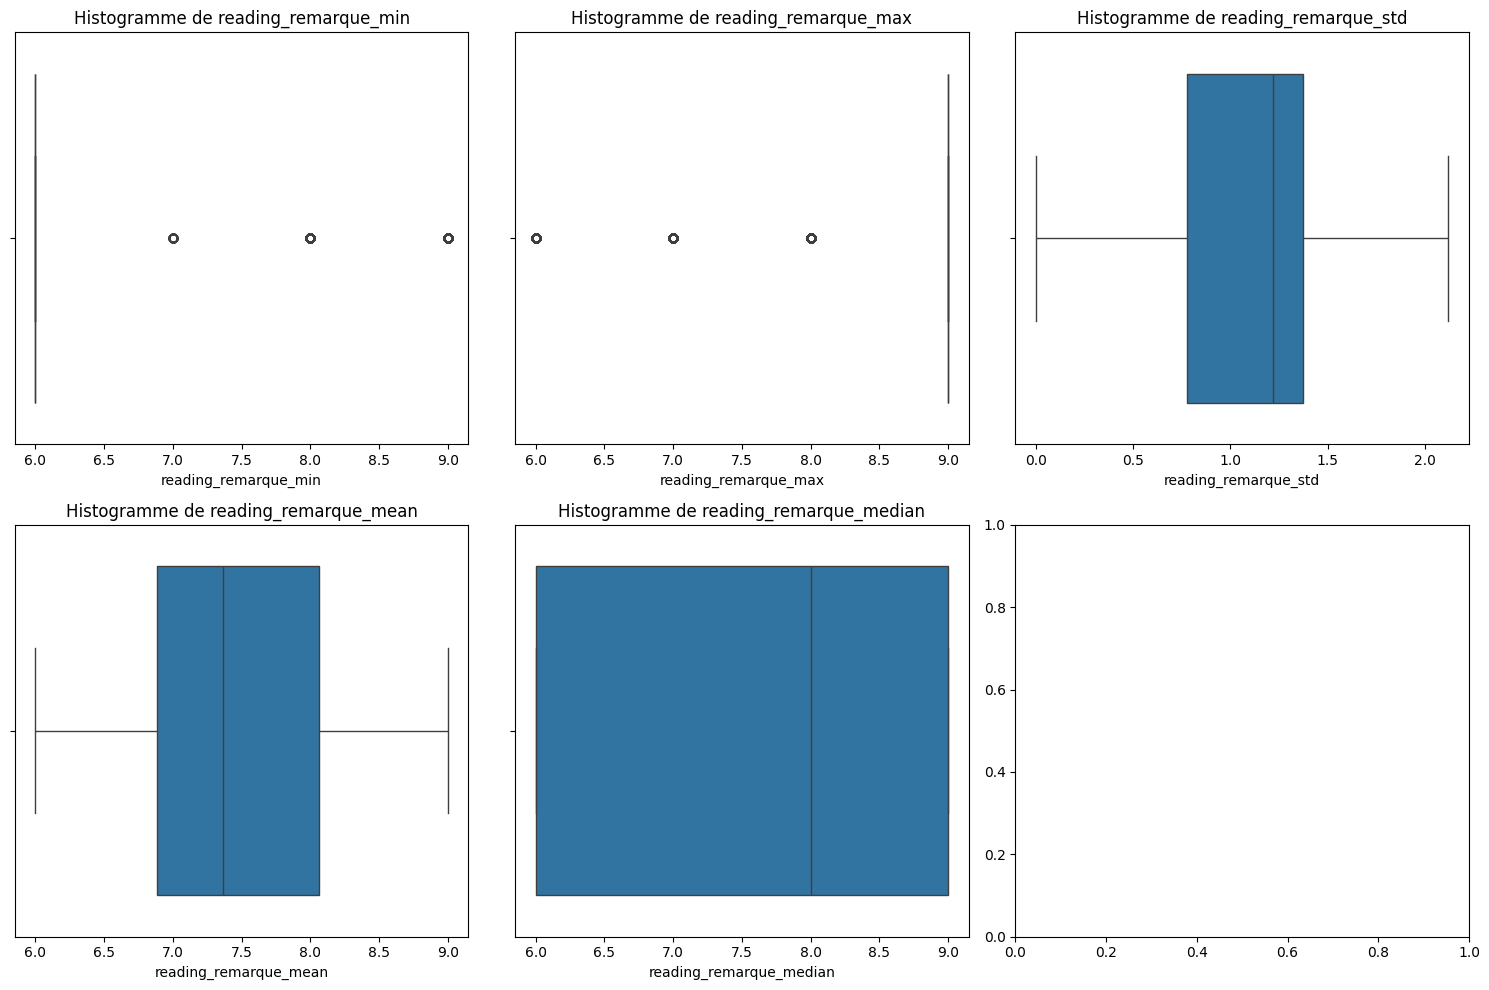

In [68]:
colonnes_reading = ['reading_remarque_min', 'reading_remarque_max', 'reading_remarque_std', 'reading_remarque_mean', 'reading_remarque_median']
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, col in enumerate(colonnes_reading):
    sns.boxplot(x=col, data=df_train, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Histogramme de {col}')
    
plt.tight_layout()
plt.show()

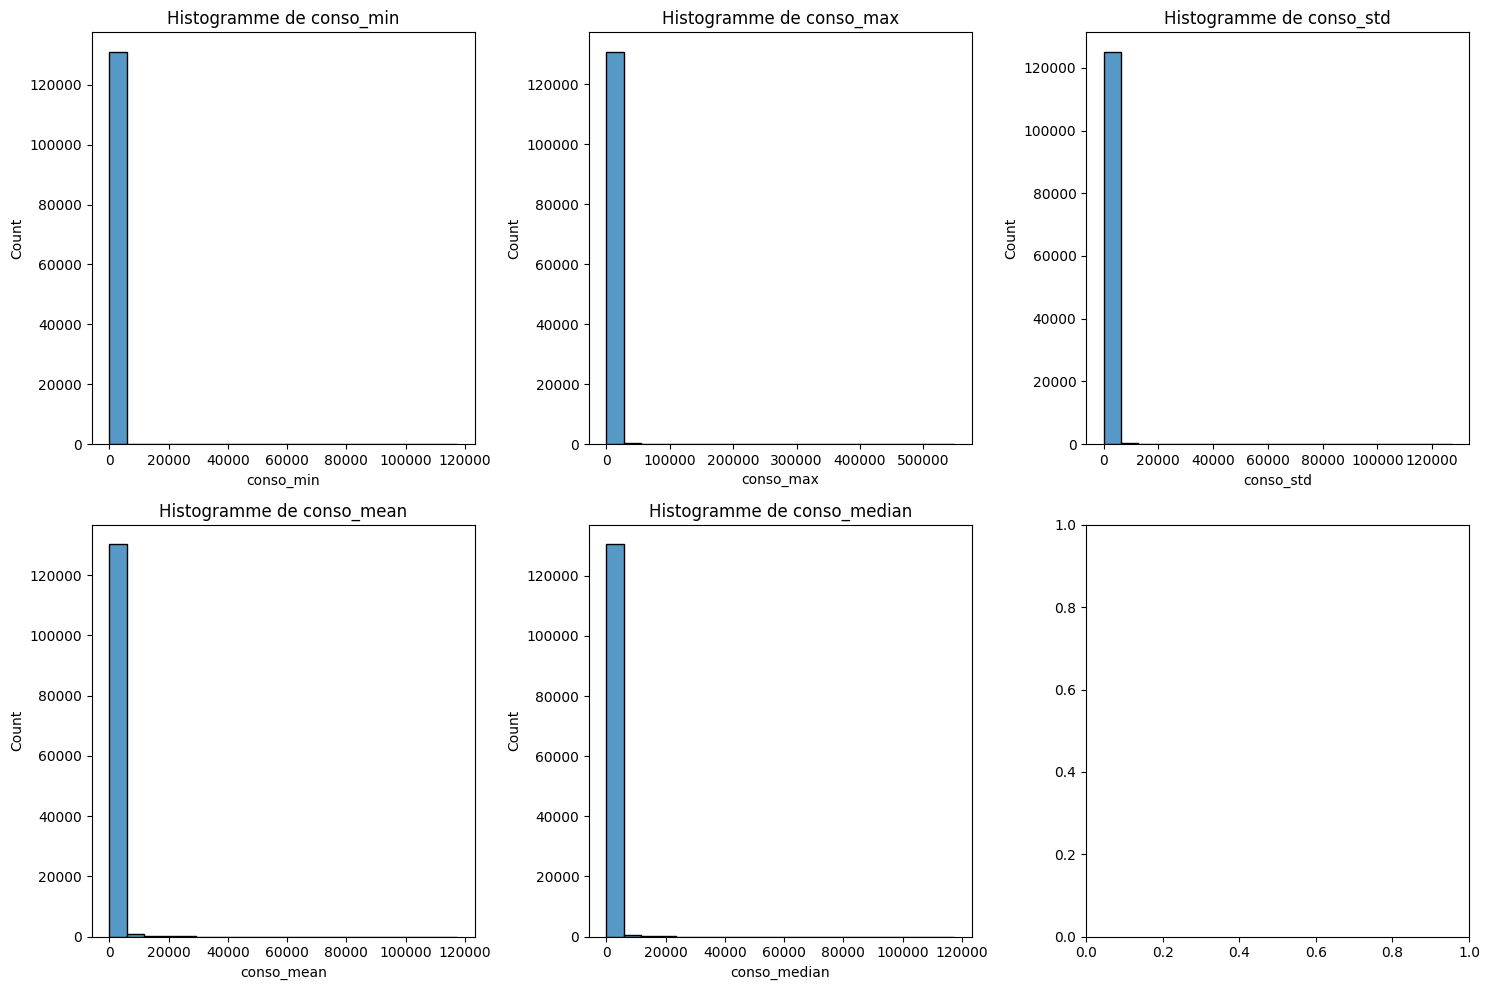

In [ ]:
colonnes_conso = ['conso_min', 'conso_max', 'conso_std', 'conso_mean', 'conso_median']
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for j, col1 in enumerate(colonnes_conso):
    sns.histplot(x=col1, data=df_train, bins=20, ax=axes[j//3, j%3])
    axes[j//3, j%3].set_title(f'Histogramme de {col1}')
    
plt.tight_layout()
plt.show()

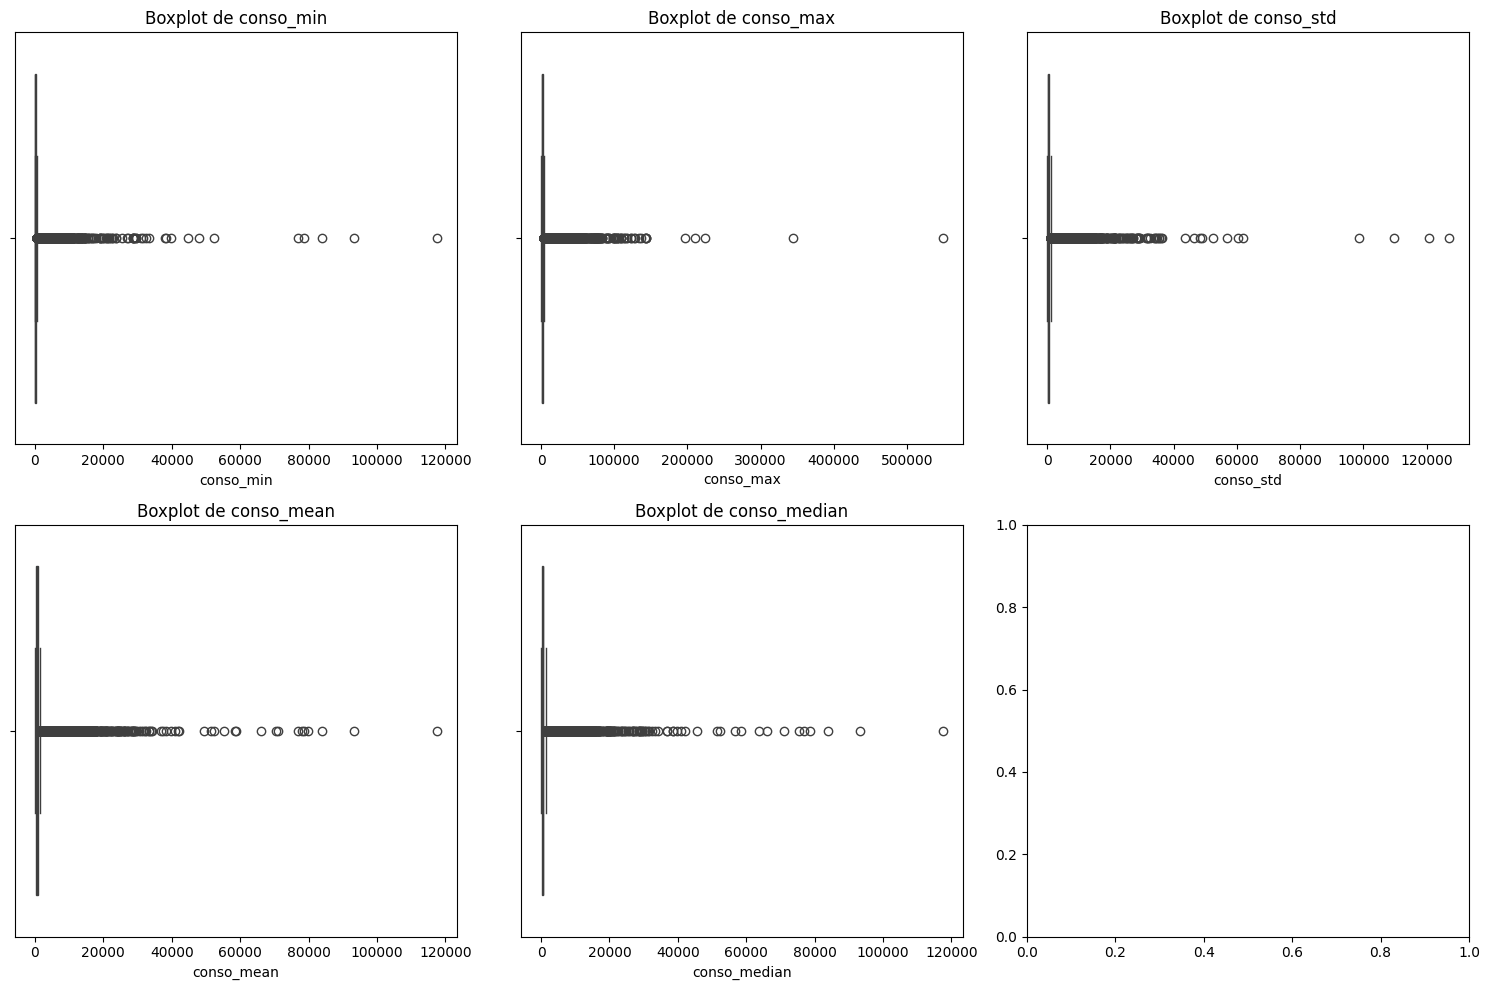

In [71]:
colonnes_cons_box = ['conso_min', 'conso_max', 'conso_std', 'conso_mean', 'conso_median']
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, col in enumerate(colonnes_cons_box):
    sns.boxplot(x=col, data=df_train, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Boxplot de {col}')
    
plt.tight_layout()
plt.show()

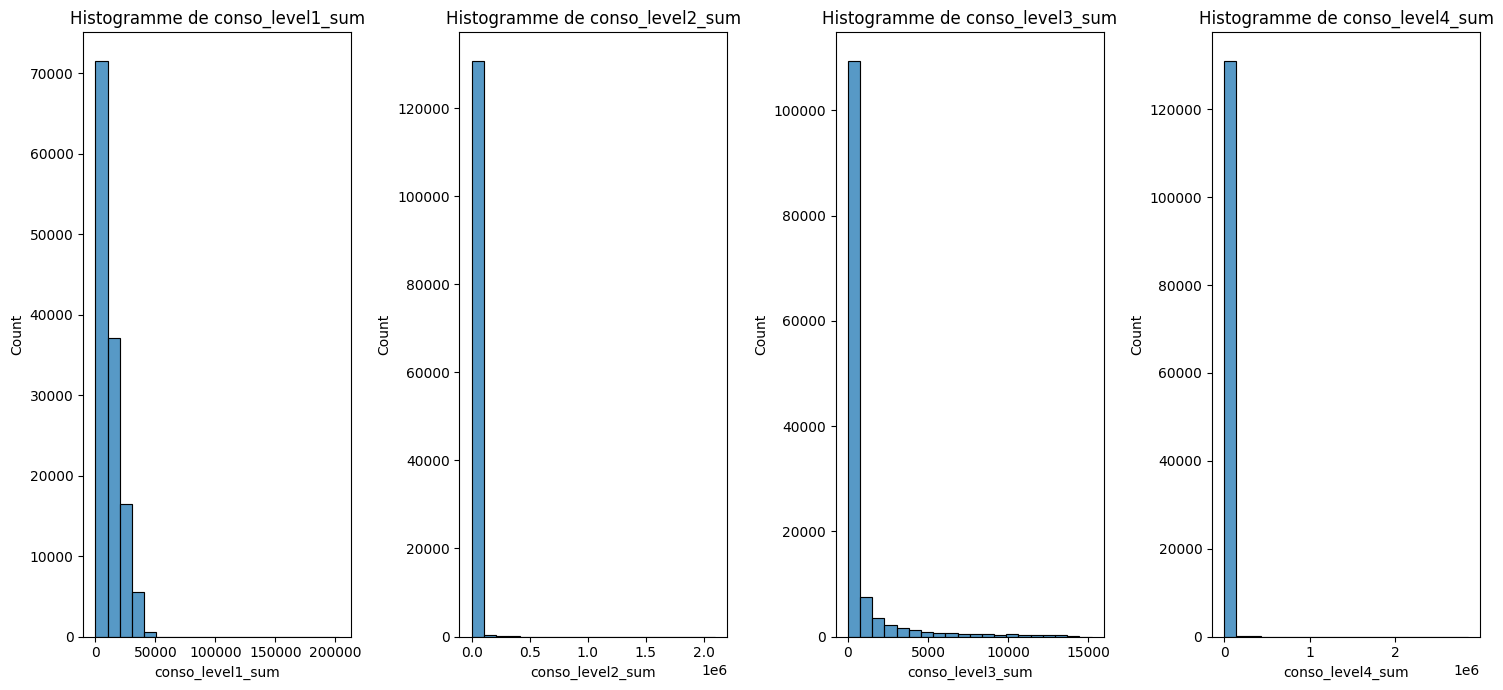

In [66]:
colonnes_conso_level = ['conso_level1_sum', 'conso_level2_sum', 'conso_level3_sum', 'conso_level4_sum']
fig, axes = plt.subplots(1, 4, figsize=(15, 7))

for t, col2 in enumerate(colonnes_conso_level):
    sns.histplot(x=col2, data=df_train, bins=20, ax=axes[t])
    axes[t].set_title(f'Histogramme de {col2}')
    
plt.tight_layout()
plt.show()

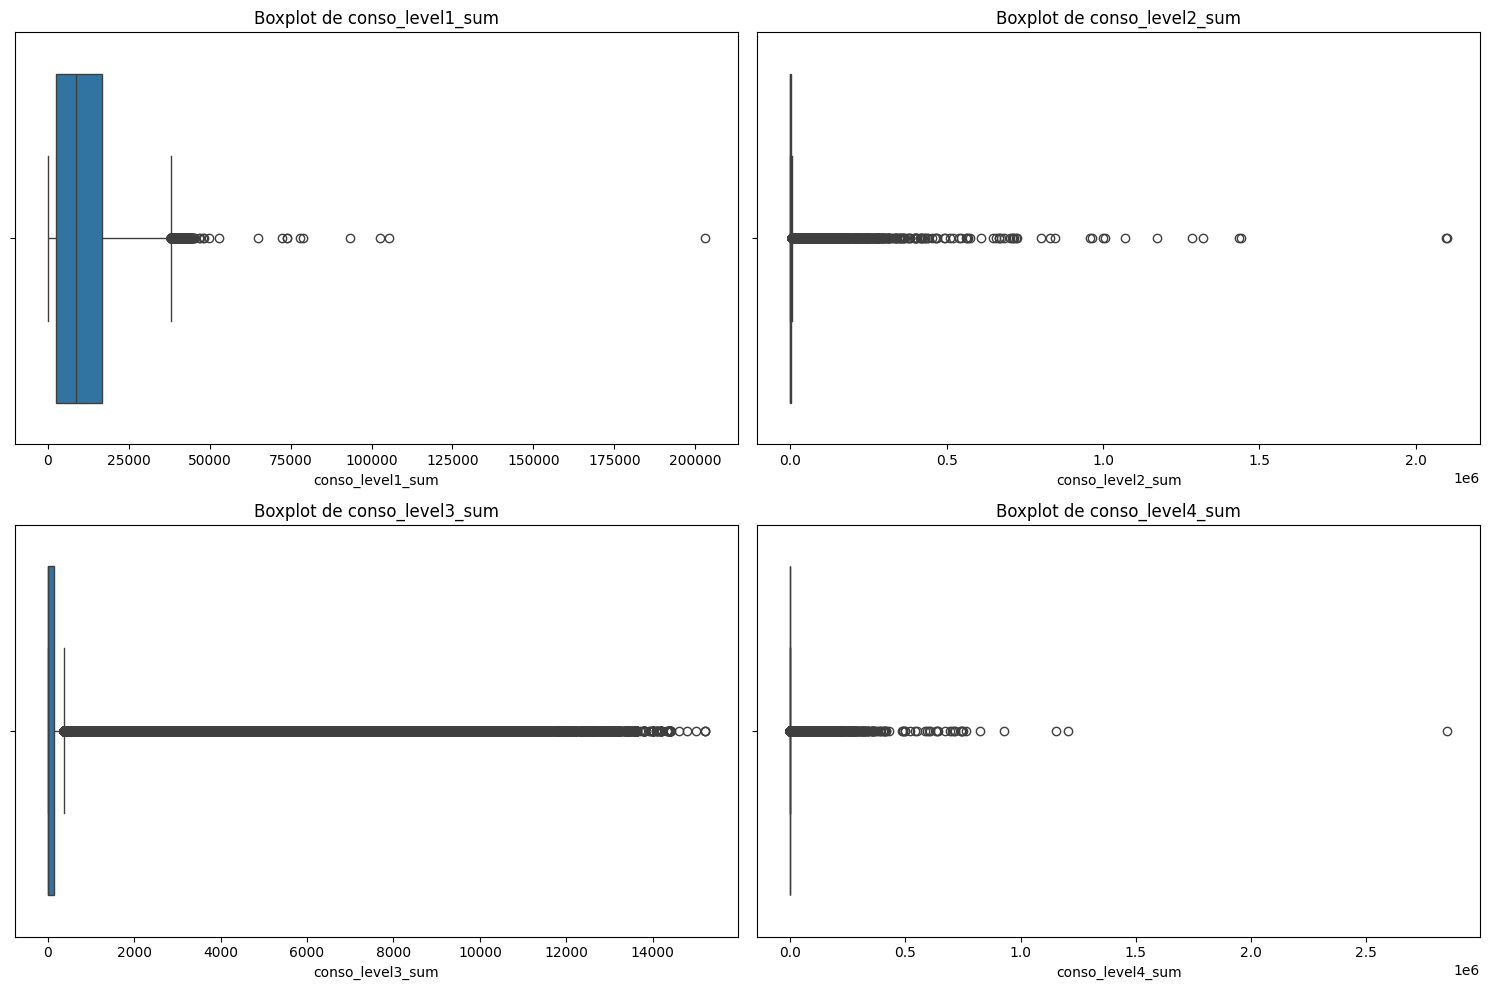

: 

In [ ]:
colonnes_level_box = ['conso_level1_sum', 'conso_level2_sum', 'conso_level3_sum', 'conso_level4_sum']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for i, col in enumerate(colonnes_level_box):
    sns.boxplot(x=col, data=df_train, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Boxplot de {col}')
    
plt.tight_layout()
plt.show()

## ANALYSE BIVARIEE